In [22]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import random as r
from timeit import default_timer as timer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Model training

In [23]:
import pandas as pd
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_train.data',sep=" ", header=None)
print(data.shape)
data.head() # Preview Data

(6000, 5001)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,550,0,495,0,0,0,0,976,0,0,0,0,983,0,995,0,983,0,0,983,0,0,0,0,0,983,0,0,0,0,0,0,0,0,0,0,0,0,991,983,...,0,0,513,0,533,811,0,0,0,983,0,0,0,0,0,983,991,0,0,0,983,0,0,0,0,0,0,0,0,0,0,0,991,991,0,0,0,0,983,NaN
1,0,0,0,0,0,0,0,976,0,0,0,0,0,0,584,0,0,0,0,0,0,0,0,0,0,983,0,0,0,0,0,0,0,0,0,898,0,0,0,0,...,0,0,932,0,0,764,828,0,0,0,983,0,0,0,0,0,991,0,0,0,0,0,0,0,0,0,0,0,0,0,475,0,991,0,0,991,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,0,0,983,0,995,983,976,0,0,0,0,0,0,0,0,983,0,742,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,991,0,0,991,0,0,0,0,0,0,0,0,0,0,584,0,0,0,0,0,940,0,0,0,0,0,616,0,0,0,0,0,0,0,0,0,0,NaN
3,0,0,742,0,0,0,0,684,0,956,0,0,983,0,991,816,983,0,0,0,0,0,0,0,0,685,0,767,0,0,0,0,0,0,991,0,0,0,0,0,...,0,0,748,0,0,729,0,991,0,808,0,0,0,0,0,0,991,0,874,0,859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,674,0,0,838,NaN
4,0,0,0,0,0,0,0,608,0,979,0,0,0,0,972,0,0,0,0,0,0,0,0,480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,991,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,675,780,0,0,0,0,983,0,0,0,0,0,991,0,0,828,0,0,0,0,0,0,NaN


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 5001 entries, 0 to 5000
dtypes: float64(1), int64(5000)
memory usage: 228.9 MB


In [25]:
label= pd.read_csv('/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_train.labels',sep=" ", header=None)
label.head()

,0
0,1
1,-1
2,1
3,1
4,1


In [0]:
gisette_train = '/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_train.data'
data=np.loadtxt(gisette_train, unpack=True)
gisette_label = '/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_train.labels'
label=np.loadtxt(gisette_label, unpack=True)

### Subgradient descent method

In [0]:
#Converting the data to X and Y
A=np.transpose(data[:-1])
#print(A)
(n,m)=A.shape
Y=np.transpose(label)
#print(A.shape)
T=[[0 for x in range(m+1)] for y in range(n)]
X=np.array(T)
#print(X.shape)
#print(X[1][:].shape)
for i in range(n):
    for j in range(m):
        X[i][j]=A[i][j]
for i in range(n):
    X[i][m]=1
#print(X)

In [0]:
def subdiff(w,matrix,col):
    (n,m)= matrix.shape
    u=[1 for i in range (m)]
    v=0.0001*w
    for i in range(n):
        v+= -1/n*col[i]*np.transpose(matrix[i][:])/(1+np.exp(col[i]*np.matmul(np.transpose(w),matrix[i][:])))
    return v

In [0]:
def fvalue(matrix,col,w):
    (n,m)=matrix.shape
    v=0.0001/2*np.linalg.norm(w,ord=2)**2
    for i in range(n):
        v += 1/n*np.log(1+np.exp(-col[i]*np.matmul(np.transpose(w),matrix[i][:])))
    return v

In [0]:
## Subgradient descent method
def regress(matrix,col):
    (n,m)= matrix.shape
    w = np.ones(m)
    fbest=100*np.ones(1001)
    value=np.ones(1000)
    for i in range(1000):
        v=subdiff(w,matrix,col) #choose a subgradient
        w += -1/np.sqrt(i+1)*v# x^{k+1}=x^k-f(x^k)/(norm(v)^2)*v
        value[i]=fvalue(X,Y,w) #compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
        else:
            fbest[i+1]=fbest[i]
    return (w, value, fbest)


In [31]:
start = timer()
(gdm,value, fbest)=regress(X,Y)
end = timer()
print('time=',end - start)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


time= 350.61950957499994


### Stochastic gradient descent method

In [0]:
def subdiffsto(w,matrix,col):
    (n,m)= X.shape
    v=0.000001*w-col*np.transpose(matrix)/(1+np.exp(col*np.matmul(np.transpose(w),matrix)))
    return v

In [0]:
##Stochastic subgradient descent method
def storegress(matrix,col):
    (n,m)= matrix.shape
    w = np.ones(m)
    fbest=100*np.ones(10001)
    a=np.ones(m)
    value=np.ones(10000)
    for i in range(10000):
        j=r.randint(0,n-1) #choose randomly j in [0,n-1]
        v=subdiffsto(w,matrix[j][:],col[j]) #choose a subgradient of |a_j'x-b_j|
        w += -1/np.sqrt(i+1)*v #x^{k+1}=x^k-1/(norm(v)*sqrt(i+1))*v
        value[i]=fvalue(X,Y,w) #compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
            a+=-a+w
        else:
            fbest[i+1]=fbest[i]
    return (a, w, value, fbest)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


time= 1190.0256829169994
value= [inf inf inf ... inf inf inf]
fbest= [100. 100. 100. ... 100. 100. 100.]


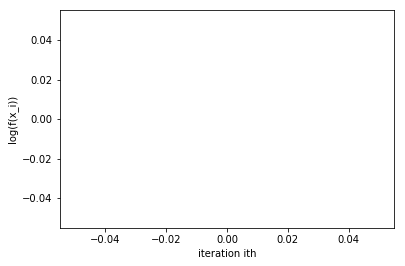

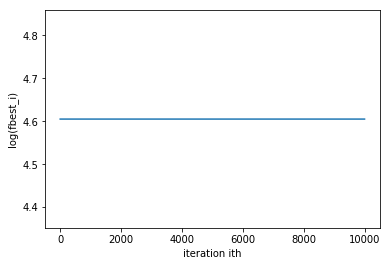

In [34]:
start = timer()
(wstobest,stogdm,value, fbest)=storegress(X,Y)
end = timer()
print('time=',end - start)
#print('x=',x)
print('value=',value)
print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i)')
plt.show()

## Model testing

In [0]:
gisette_test = '/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_valid.data'
datatest=np.loadtxt(gisette_test, unpack=True)
#prettyP(data)
data.shape
test_label='/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/gisette_valid.labels'
labeltest=np.loadtxt(test_label, unpack=True)

In [36]:
B=np.transpose(datatest[:-1])
(n,m)=B.shape
print(B.shape)
C=np.transpose(labeltest)
Test=[[0 for x in range(m+1)] for y in range(n)]
Xtest=np.array(Test)
for i in range(n):
    for j in range(m):
        Xtest[i][j]=B[i][j]
for i in range(n):
    Xtest[i][m]=1
#prettyP(Xtest)

(1000, 4999)


In [37]:
y1=np.matmul(Xtest,gdm)
y2=np.matmul(Xtest,wstobest)
for i in range(n):
    if y1[i]>0:
        y1[i]=1
    else:
        y1[i]=-1
for i in range(n):
    if y2[i]>0:
        y2[i]=1
    else:
        y2[i]=-1
print(y1)
print(y2)
count1=0
for i in range(n):
    if y1[i]==C[i]:
        count1+=1
eff1=count1/n
count2=0
for i in range(n):
    if y2[i]==C[i]:
        count2+=1
eff2=count2/n
print('efficientcy1=',eff1)
print('efficientcy2=',eff2)

[ 1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.
 -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.
  1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1. -1.
 -1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1.
  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1.
  1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.
 -1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.
 -1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1.
  1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1. -1.
  1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.
 -1. -1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1

SVM gives higher accuracy in this problem and the subgradient descent method slightly performs better than the other one.